In [0]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


--2021-11-02 11:15:03-- https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv.1’

daily-bike-share.cs 0%[ ] 0 --.-KB/s daily-bike-share.cs 100%[===================>] 47.66K --.-KB/s in 0.01s 

2021-11-02 11:15:03 (3.29 MB/s) - ‘daily-bike-share.csv.1’ saved [48800/48800]

 instant dteday season yr ... hum windspeed rentals day
0 1 1/1/2011 1 0 ... 0.805833 0.160446 331 1
1 2 1/2/2011 1 0 ... 0.696087 0.248539 131 2
2 3 1/3/2011 1 0 ... 0.437273 0.248309 120 3
3 4 1/4/2011 1 0 ... 0.590435 0.160296 108 4
4 5 1/5/2011 1 0 ... 0.436957 0.186900 82 5

[5 rows x 15 columns]

In [0]:
# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Training Set: 511 rows
Test Set: 220 rows

Lasso() 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488

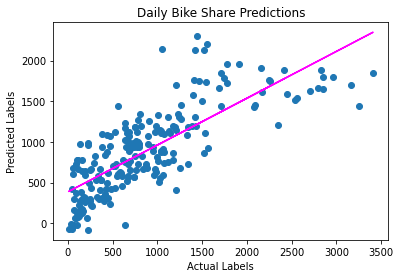

In [0]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [0]:
####  Decision Tree Algo
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

--- feature_6 <= 0.45
 |--- feature_4 <= 0.50
 | |--- feature_7 <= 0.32
 | | |--- feature_8 <= 0.41
 | | | |--- feature_1 <= 2.50
 | | | | |--- feature_7 <= 0.26
 | | | | | |--- value: [317.00]
 | | | | |--- feature_7 > 0.26
 | | | | | |--- feature_8 <= 0.36
 | | | | | | |--- value: [558.00]
 | | | | | |--- feature_8 > 0.36
 | | | | | | |--- value: [515.00]
 | | | |--- feature_1 > 2.50
 | | | | |--- feature_8 <= 0.40
 | | | | | |--- feature_8 <= 0.37
 | | | | | | |--- value: [968.00]
 | | | | | |--- feature_8 > 0.37
 | | | | | | |--- value: [981.00]
 | | | | |--- feature_8 > 0.40
 | | | | | |--- feature_0 <= 2.50
 | | | | | | |--- value: [710.00]
 | | | | | |--- feature_0 > 2.50
 | | | | | | |--- value: [532.00]
 | | |--- feature_8 > 0.41
 | | | |--- feature_7 <= 0.25
 | | | | |--- feature_6 <= 0.18
 | | | | | |--- feature_8 <= 0.43
 | | | | | | |--- value: [284.00]
 | | | | | |--- feature_8 > 0.43
 | | | | | | |--- feature_8 <= 0.45
 | | | | | | | |--- value: [150.00]
 | | | | | | |--- feature_8 > 0.45
 | | | | | | | |--- feature_6 <= 0.17
 | | | | | | | | |--- feature_9 <= 0.34
 | | | | | | | | | |--- feature_7 <= 0.17
 | | | | | | | | | | |--- value: [68.00]
 | | | | | | | | | |--- feature_7 > 0.17
 | | | | | | | | | | |--- value: [67.00]
 | | | | | | | | |--- feature_9 > 0.34
 | | | | | | | | | |--- value: [73.00]
 | | | | | | | |--- feature_6 > 0.17
 | | | | | | | | |--- value: [117.00]
 | | | | |--- feature_6 > 0.18
 | | | | | |--- feature_9 <= 0.17
 | | | | | | |--- feature_3 <= 3.00
 | | | | | | | |--- value: [140.00]
 | | | | | | |--- feature_3 > 3.00
 | | | | | | | |--- value: [123.00]
 | | | | | |--- feature_9 > 0.17
 | | | | | | |--- feature_7 <= 0.19
 | | | | | | | |--- value: [333.00]
 | | | | | | |--- feature_7 > 0.19
 | | | | | | | |--- feature_8 <= 0.53
 | | | | | | | | |--- feature_9 <= 0.21
 | | | | | | | | | |--- value: [251.00]
 | | | | | | | | |--- feature_9 > 0.21
 | | | | | | | | | |--- feature_3 <= 3.50
 | | | | | | | | | | |--- value: [217.00]
 | | | | | | | | | |--- feature_3 > 3.50
 | | | | | | | | | | |--- value: [205.00]
 | | | | | | | |--- feature_8 > 0.53
 | | | | | | | | |--- feature_6 <= 0.24
 | | | | | | | | | |--- value: [288.00]
 | | | | | | | | |--- feature_6 > 0.24
 | | | | | | | | | |--- value: [275.00]
 | | | |--- feature_7 > 0.25
 | | | | |--- feature_9 <= 0.11
 | | | | | |--- value: [706.00]
 | | | | |--- feature_9 > 0.11
 | | | | | |--- feature_8 <= 0.54
 | | | | | | |--- feature_5 <= 1.50
 | | | | | | | |--- feature_7 <= 0.26
 | | | | | | | | |--- value: [309.00]
 | | | | | | | |--- feature_7 > 0.26
 | | | | | | | | |--- feature_0 <= 2.50
 | | | | | | | | | |--- feature_7 <= 0.27
 | | | | | | | | | | |--- value: [408.00]
 | | | | | | | | | |--- feature_7 > 0.27
 | | | | | | | | | | |--- truncated branch of depth 2
 | | | | | | | | |--- feature_0 > 2.50
 | | | | | | | | | |--- feature_7 <= 0.29
 | | | | | | | | | | |--- value: [502.00]
 | | | | | | | | | |--- feature_7 > 0.29
 | | | | | | | | | | |--- value: [440.00]
 | | | | | | |--- feature_5 > 1.50
 | | | | | | | |--- value: [618.00]
 | | | | | |--- feature_8 > 0.54
 | | | | | | |--- feature_9 <= 0.18
 | | | | | | | |--- feature_9 <= 0.16
 | | | | | | | | |--- value: [354.00]
 | | | | | | | |--- feature_9 > 0.16
 | | | | | | | | |--- value: [318.00]
 | | | | | | |--- feature_9 > 0.18
 | | | | | | | |--- feature_3 <= 3.50
 | | | | | | | | |--- value: [195.00]
 | | | | | | | |--- feature_3 > 3.50
 | | | | | | | | |--- value: [155.00]
 | |--- feature_7 > 0.32
 | | |--- feature_9 <= 0.25
 | | | |--- feature_7 <= 0.38
 | | | | |--- feature_7 <= 0.36
 | | | | | |--- feature_6 <= 0.36
 | | | | | | |--- feature_1 <= 10.50
 | | | | | | | |--- feature_7 <= 0.33
 | | | | | | | | |--- feature_9 <= 0.21
 | | | | | | | | | |--- feature_9 <= 0.20
 | | | | | | | | | | |--- truncated branch of depth 2
 | | | | | | | | | |--- feature_9 > 0.20
 | | | | | | | | | | |--- value: [1047.00]
 | | | | | | | | |--- feature_9 > 0.21

MSE: 250585.02272727274
RMSE: 500.5846808755465
R2: 0.5087437905720069

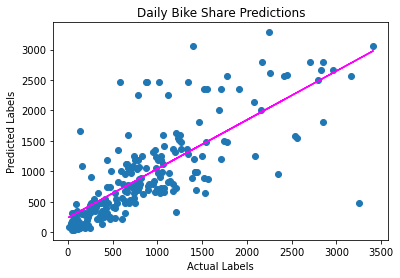

In [0]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 110593.33289727272
RMSE: 332.55575907999656
R2: 0.7831887120953245

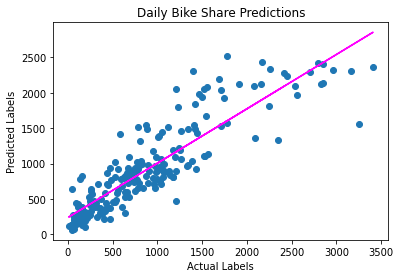

In [0]:
#  Ensemble Algorithm
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 104068.0382066616
RMSE: 322.59578144585464
R2: 0.7959811427850034

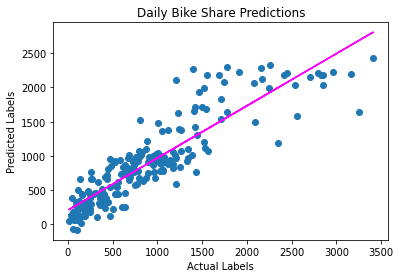

In [0]:
# Boosting Ensemble Algorithm
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 103898.35252747047
RMSE: 322.3326736889552
R2: 0.7963138009089662

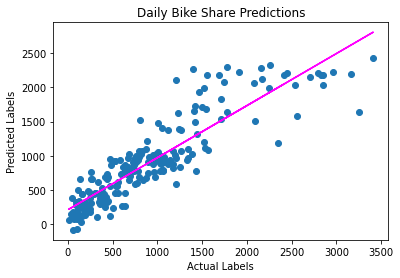

In [0]:
# Optimize Hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }
# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [0]:
# Preprocessing data

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

In [0]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [0]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [0]:
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num',
 Pipeline(steps=[('scaler',
 StandardScaler())]),
 [6, 7, 8, 9]),
 ('cat',
 Pipeline(steps=[('onehot',
 OneHotEncoder(handle_unknown='ignore'))]),
 [0, 1, 2, 3, 4, 5])])),
 ('regressor', GradientBoostingRegressor())])

MSE: 105076.09161798141
RMSE: 324.1544255721051
R2: 0.7940049173412149

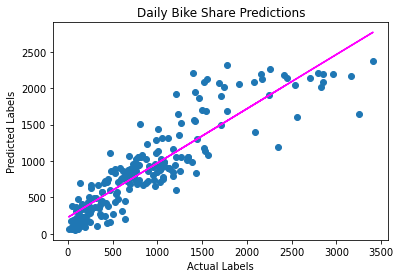

In [0]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num',
 Pipeline(steps=[('scaler',
 StandardScaler())]),
 [6, 7, 8, 9]),
 ('cat',
 Pipeline(steps=[('onehot',
 OneHotEncoder(handle_unknown='ignore'))]),
 [0, 1, 2, 3, 4, 5])])),
 ('regressor', RandomForestRegressor())]) 

MSE: 104203.22890000002
RMSE: 322.8052491828471
R2: 0.7957161099157738

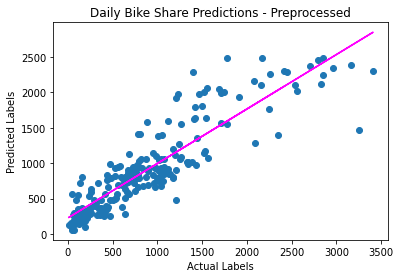

In [0]:
# another RandomForestRegressor algo 

# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [0]:
# save model
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

Out[16]: ['./bike-share.pkl']

In [0]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 96 rentals

In [0]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
556.0
746.0
246.0
195.0
279.0